### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ignore warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Loading data from loan CSV

In [3]:
loan_df = pd.read_csv('loan.csv')

### Check shape & datatype of loan data

In [4]:
print(loan_df.shape)
print(loan_df.info())
print(loan_df.dtypes)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


### check the first five rows

In [5]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Checking for null values in the dataset

In [6]:
loan_df.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

### Checking missing values in rows dataset

In [7]:
loan_df.isnull().all(axis=1).sum()

0

### Checking missing values in columns dataset

In [8]:
loan_df.isnull().all(axis=0).sum()

54

### Find columns with more than 50% null values

In [9]:
null_percentage = loan_df.isnull().mean().round(2) * 100
null_columns = null_percentage[null_percentage > 50].index
print(null_columns)
len(null_columns)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

57

###  Dropping null columns from the dataset and then checking the dataset shape

In [10]:
loan = loan_df.drop(columns=null_columns)

In [11]:
loan.shape

(39717, 54)

### Checking now for nulls again

In [12]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

### Drop additional columns we still see most null values

In [13]:
loan.drop(['url','id','desc','emp_title','last_pymnt_d','tax_liens','collections_12_mths_ex_med','chargeoff_within_12_mths'], axis=1, inplace=True)

In [14]:
loan.shape

(39717, 46)

### Checking columns which have unique values

In [15]:
loan.nunique().sort_values(ascending=False)

member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
zip_code                     823
earliest_cr_line             526
int_rate                     371
last_credit_pull_d           106
total_acc                     82
issue_d                       55
addr_state                    50
open_acc                      40
sub_grade                     35
purpose                       14
emp_length

### Dropping all the columns which has only single values in all the columns

In [16]:
loan.drop(["pymnt_plan",
        "policy_code",
        "application_type",
        "acc_now_delinq",
        "delinq_amnt"], axis=1, inplace=True)

In [17]:
loan.isnull().sum()

member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_py

In [18]:
loan['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

### Rows with a loan status of 'Current' are excluded from the analysis as these loans are still in progress.
### Therefore, rows with the status 'Current' are being removed.

In [19]:
loan = loan[loan['loan_status'] != "Current"]
loan['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

In [20]:
loan.shape

(38577, 41)

In [21]:
loan.isnull().sum().sort_values(ascending=False)

emp_length                 1033
pub_rec_bankruptcies        697
revol_util                   50
title                        11
last_credit_pull_d            2
out_prncp_inv                 0
pub_rec                       0
revol_bal                     0
total_acc                     0
initial_list_status           0
out_prncp                     0
total_pymnt_inv               0
total_pymnt                   0
inq_last_6mths                0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
open_acc                      0
member_id                     0
earliest_cr_line              0
home_ownership                0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
annual_i

### emp_length column is having 1033 null value
### Fixing the null value in emp_length column

In [22]:
loan["emp_length"].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

### Most occurred category in the "emp_length" column is "10+ years"
### Hence, we can replace null values with "10+ years"

In [23]:
loan["emp_length"] = loan["emp_length"].fillna(loan["emp_length"].mode()[0])
loan["emp_length"].value_counts()

emp_length
10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [24]:
loan.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,May-16,0.0
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,0.0
2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,May-16,0.0
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16,0.0
5,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,...,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,Jan-16,0.0


In [25]:
# Using sum to count zeros
pub_rec_bankruptcies_zero_count = (loan['pub_rec_bankruptcies'] == 0).sum()
out_prncp_inv_zero_count = (loan['out_prncp_inv'] == 0).sum()

# Print the results
print(f"Count of zeros in 'pub_rec_bankruptcies': {pub_rec_bankruptcies_zero_count}")
print(f"Count of zeros in 'out_prncp_inv': {out_prncp_inv_zero_count}")

Count of zeros in 'pub_rec_bankruptcies': 36238
Count of zeros in 'out_prncp_inv': 38577


### Dropping'out_prncp_inv','pub_rec_bankruptcies'

In [26]:
loan.drop(['out_prncp_inv','pub_rec_bankruptcies'], axis = 1, inplace = True)

### Format emp_length column to have only numbers.

In [27]:
loan['emp_length']=loan.emp_length.str.extract('(\d+)')
loan.emp_length

0        10
1         1
2        10
3        10
5         3
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 38577, dtype: object

### Removing % symbol from int_rate, revol_util columns

In [28]:
loan['int_rate'] = loan['int_rate'].str.rstrip('%').apply(pd.to_numeric)
loan['revol_util'] = loan['revol_util'].str.rstrip('%').apply(pd.to_numeric)

### Removing" months" apart from the string and convert the remaining numeric part to a float from term column

In [29]:
loan['term'] = loan['term'].str.replace(' months', '').astype(float)

In [30]:
print(loan.dtypes)

member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                       float64
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                 float64
total_acc                    int64
initial_list_status 

### convert amount columns into numeric data to find some correlation among important ones.

In [31]:
cols1 = ['int_rate','emp_length']
loan[cols1] = loan[cols1].apply(pd.to_numeric)

In [32]:
print(loan.dtypes)

member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                       float64
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_length                   int64
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                 float64
total_acc                    int64
initial_list_status 

In [33]:
mean_revol_util = loan['revol_util'].mean()
loan['revol_util'].fillna(mean_revol_util, inplace=True)

## Univariate Analysis

### Analyse the loan_status

In [34]:
(loan.loan_status.value_counts()*100)/len(loan)

loan_status
Fully Paid     85.413588
Charged Off    14.586412
Name: count, dtype: float64

In [35]:
### 85.41% of loans fall under the "Fully Paid" category
### Around 14.59% of loans are "Charged Off"
### Identifying patterns or predictors of "Charged Off" loans will be crucial for minimizing credit losses and enhancing decision-making processes during loan approvals.

### Analyse the Terms

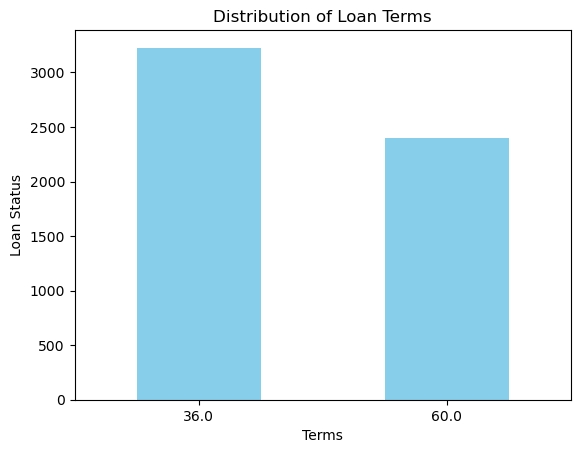

In [36]:
charged_off_loans = loan[loan['loan_status'] == 'Charged Off']
term_counts = charged_off_loans['term'].value_counts()

term_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Loan Terms')
plt.xlabel('Terms')
plt.ylabel('Loan Status')
plt.xticks(rotation=0)
plt.show()

# Observations:
### 36 months loan defaults more than 60 months loans

### Analyse Home Ownership

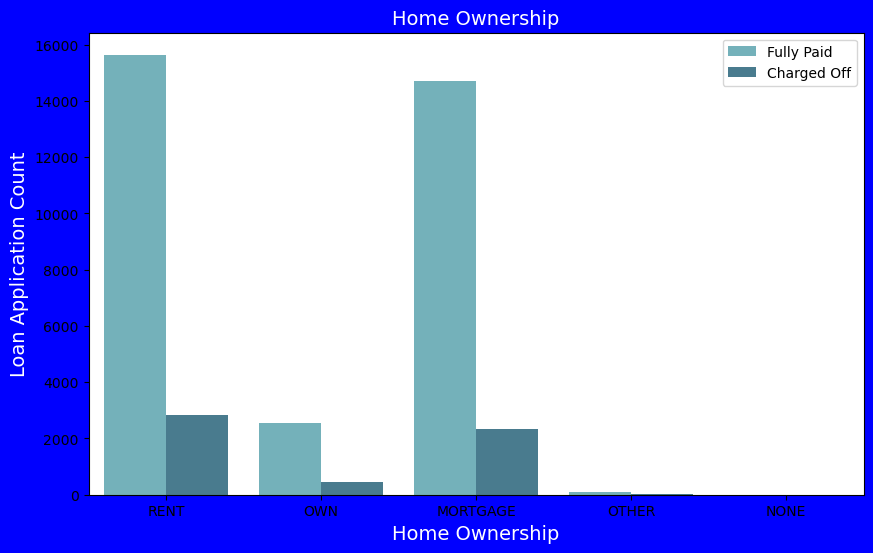

In [37]:
plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="home_ownership",data=loan,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of them living in rented home or mortgaged their home.
# Applicant numbers are high from these categories so charged off is high too.

### Analyse purpose of loan

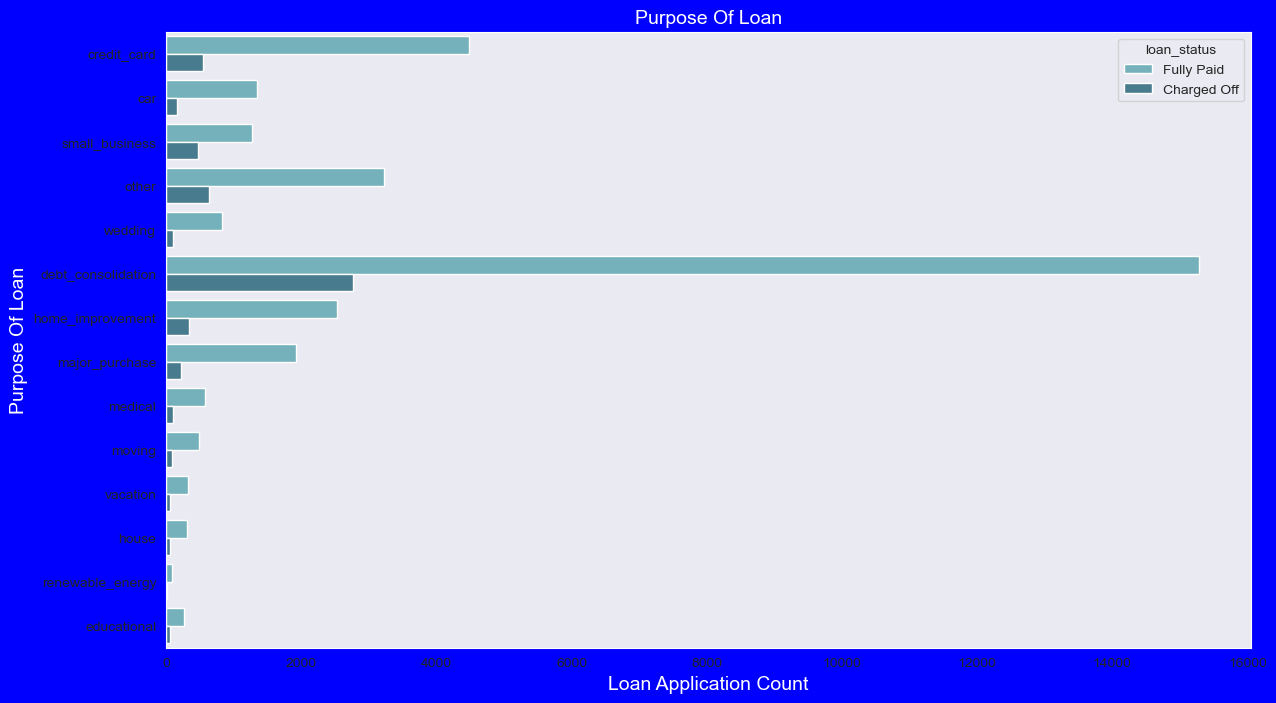

In [38]:
plt.figure(figsize=(14,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=loan,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
# Number of chraged off count also high too for these loans.

### Distribution of Loan Amount and Funded Amount

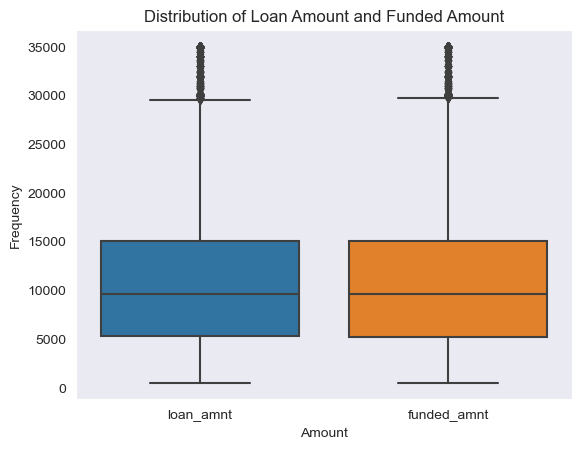

In [41]:
sns.boxplot(data=loan[['loan_amnt', 'funded_amnt']])
plt.title('Distribution of Loan Amount and Funded Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Observations: 

# The loan amount is mostly between 5500 to 15000 where outliers are mostly above 30000
# The funded amount is mostly between 5400 to 15000 where outliers are mostly above 30000

### Distribution of Interest Rate and Debt to Income Ratio

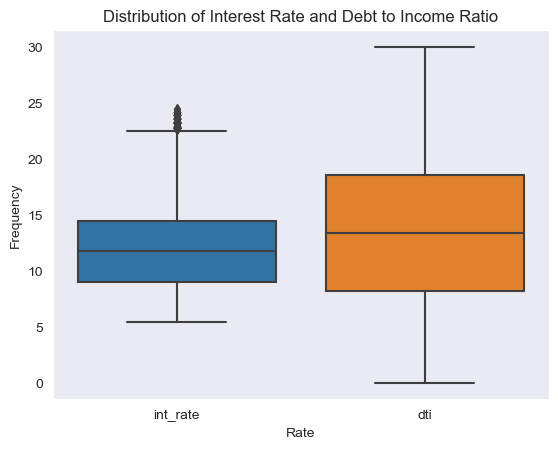

In [42]:
sns.boxplot(data=loan[['int_rate', 'dti']])
plt.title('Distribution of Interest Rate and Debt to Income Ratio')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()

# Observations: 
# The interest rate is mostly bwtween 9.25% to 14.59% where outliers are above 22.5%
# The debt to income ration is mostly between 8.17% to 18.6%

### Distribution of Issue Year and Issue Month
### Dervied columns day, year, month


In [45]:
# Convert 'issue_d' to datetime using the appropriate format
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y', errors='coerce')

# Extract the year from the datetime column
loan['issue_year'] = loan['issue_d'].dt.year

# Extract the month (optional)
loan['issue_month'] = loan['issue_d'].dt.month

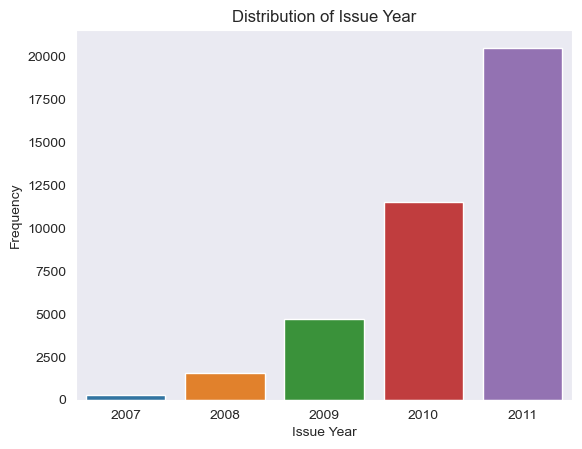

In [50]:
sns.countplot(x='issue_year', data=loan)
plt.title('Distribution of Issue Year')
plt.xlabel('Issue Year')
plt.ylabel('Frequency')
plt.show()

# Observations: 
# The number of loans issued has consistently increased year over year, reflecting a growing demand for loans over time.

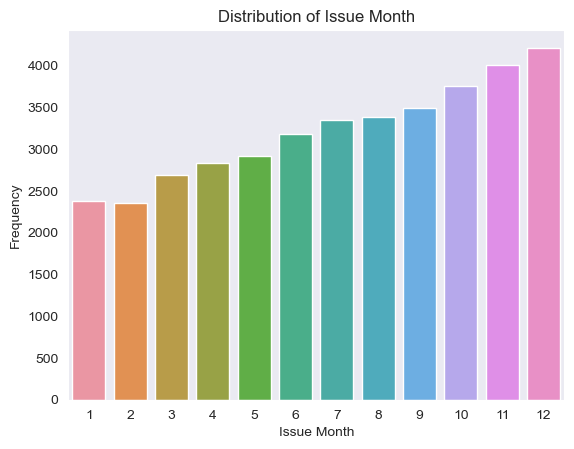

In [51]:
sns.countplot(x='issue_month', data=loan)
plt.title('Distribution of Issue Month')
plt.xlabel('Issue Month')
plt.ylabel('Frequency')
plt.show()

# Observations: 
# Loan issuance shows an upward trend within each year, with the loan count increasing steadily from January to December.

## Bivariate Analysis/Multivariate Analysis - Descriptive Statistics for following variables

### Distribution of Loan Amount, Funded Amount, Interest Rate, Installment, Annual Income and Debt to Income against the Loan Status across all Grades

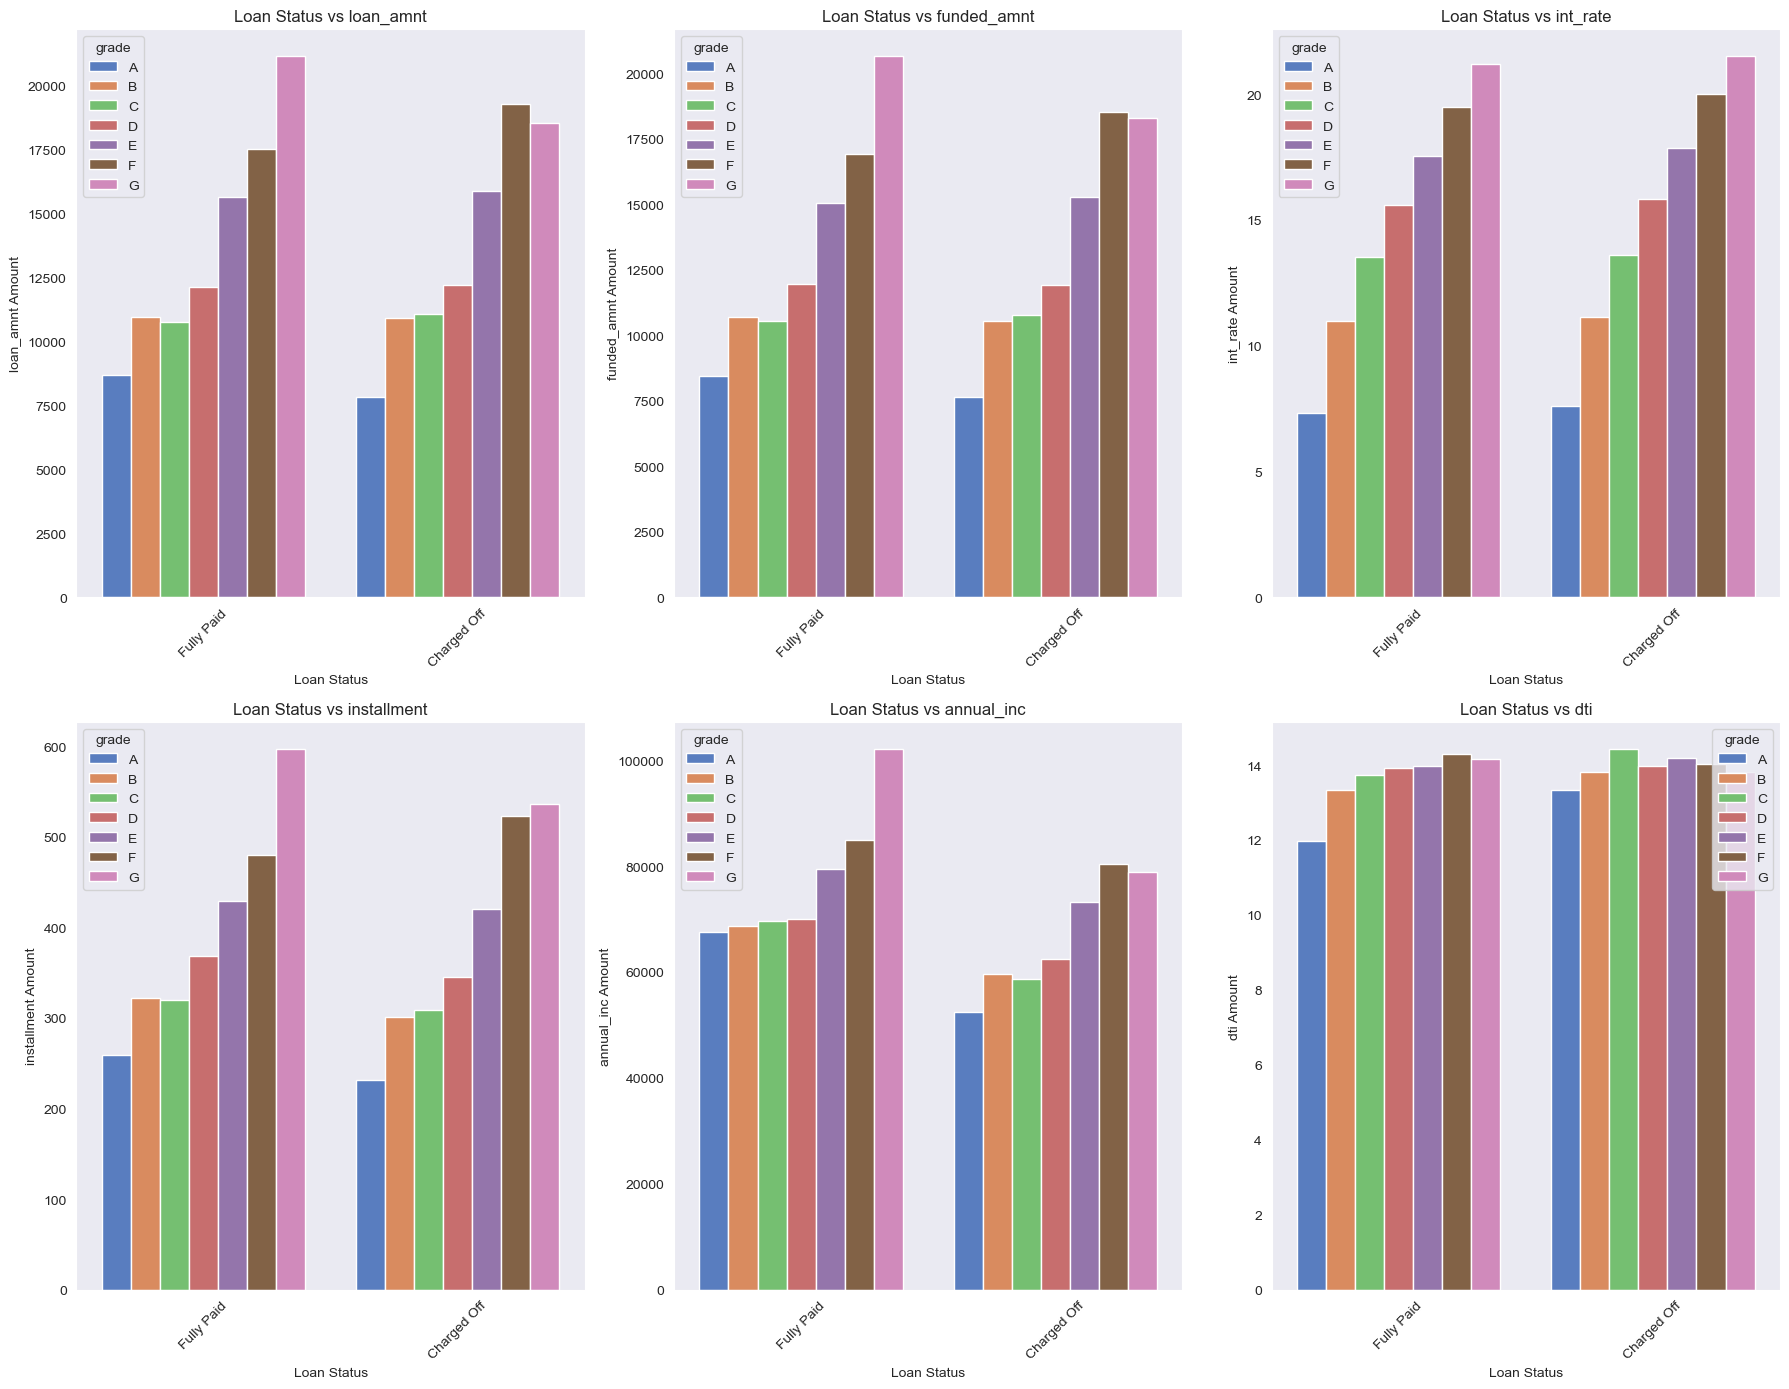

In [55]:
# List of numerical features to plot
numerical_features = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti']

# Set up the matplotlib figure with 2 rows and 3 columns (2x3 grid)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 14))

# Flatten axes for easy iteration
axes = axes.flatten()

# Define the order for grades
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Loop through each subplot and create a bar plot
for ax, col in zip(axes, numerical_features):
    sns.barplot(
        data=loan, 
        x='loan_status', 
        y=col, 
        ax=ax, 
        errorbar=None, 
        palette='muted', 
        hue='grade', 
        hue_order=grade_order  # Set the grade order
    )
    ax.set_title(f'Loan Status vs {col}')
    ax.set_xlabel('Loan Status')
    ax.set_ylabel(f'{col} Amount')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

# Observations: 

# Loan Amount vs Loan Status: Borrowers with higher grades (like A and B) generally take smaller loan amounts, possibly due to their better creditworthiness.
# Funded Amount vs Loan Status: Borrowers with lower grades tend to receive larger funded amounts, which might increase their chances of defaulting.
# Interest Rate vs Loan Status: Higher interest rates in lower-grade loans are linked to a higher chance of being Charged Off.
# Installment vs Loan Status: Larger installments, especially in lower-grade loans, increase the likelihood of default.
# Annual Income vs Loan Status: Even borrowers with high incomes but lower grades are more likely to default or keep loans in the Current status.
# Debt-to-Income Ratio (DTI) vs Loan Status: Lower-grade loans carry higher risk because of high DTI ratios, indicating borrowers might be over-leveraged.
# Risk Factors: Lower-grade loans (E, F, G) often have higher loan amounts, interest rates, and DTI ratios, making them more prone to default (Charged Off status).
# Income Influence: Borrowers with higher incomes are more likely to fully repay their loans.
# Current Loans: Loans with Current status are usually larger in amount, funding, and installments, especially in lower grades, indicating they still carry a risk of default.

### Distribution of Loan Amount, Funded Amount, Funded Amount by Investors, Interest Rate, Installment, Annual Income and Debt to Income against each other with correlation matrix

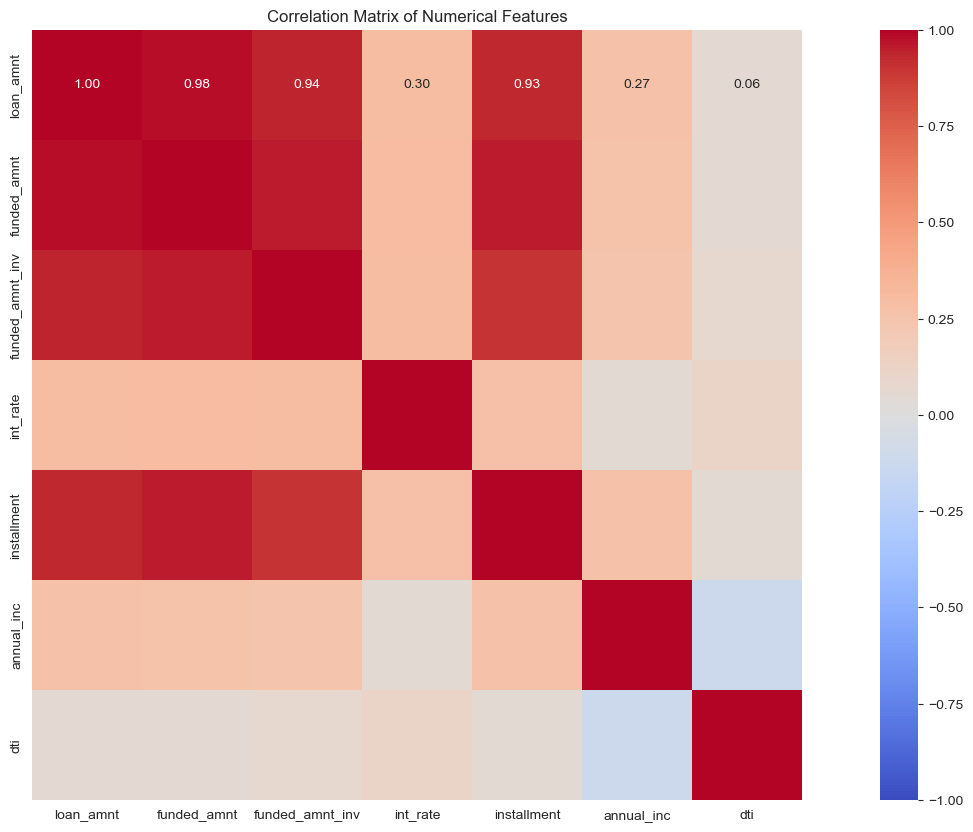

In [59]:
# Compute the correlation matrix
corr_matrix = loan[numerical_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Create a heatmap for the correlation matrix
sns.heatmap(
    corr_matrix, 
    annot=True,       # Annotate the heatmap with correlation values
    fmt=".2f",        # Format the numbers to two decimal places
    cmap="coolwarm",  # Use a diverging colormap
    vmin=-1, vmax=1,  # Correlation ranges from -1 to 1
    square=True       # Make the heatmap cells square
)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Observations: 

# Loan Amount and Funded Amount (0.98): These two are almost identical, as the funded amount is closely linked to the approved loan amount.
# Loan Amount and Installment (0.93): Bigger loan amounts lead to higher installment payments.
# Funded Amount and Installment (0.96): The funded amount strongly impacts the size of the installments.
# Funded Amount and Funded Amount by Investors (0.96): These two are highly related and increase proportionally with each other.

### Verification_status against Chargedoff

In [63]:
verfy_vs_loan = loan.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verfy_vs_loan['Total'] = verfy_vs_loan['Charged Off']+ verfy_vs_loan['Fully Paid'] 
verfy_vs_loan['Chargedoff_Proportion'] = verfy_vs_loan['Charged Off'] / verfy_vs_loan['Total']
verfy_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,verification_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,Verified,2051,10155,12206,0.168032
1,Source Verified,1434,8243,9677,0.148186
0,Not Verified,2142,14552,16694,0.128310


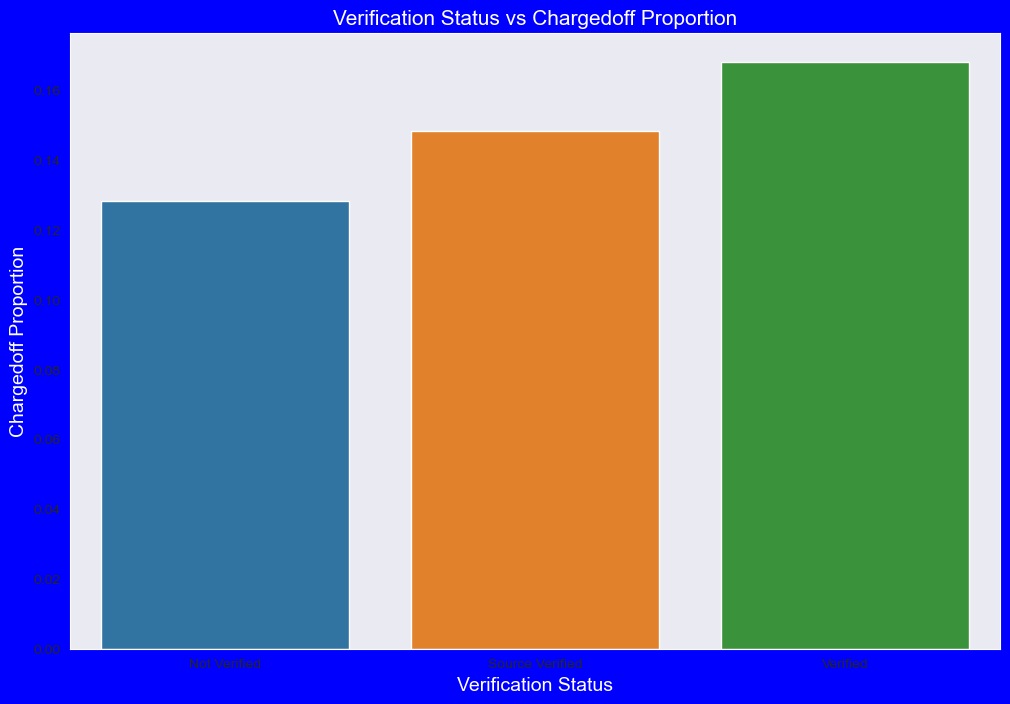

In [64]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verfy_vs_loan)
ax1.set_xlabel('Verification Status',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# There is not much difference in charged off proportion.
# This variable doesn't provide any insights for charged off.

### Distribution of Term, Grades, Home Ownership, Purpose, Verification Status and Issue Year against the Loan Status

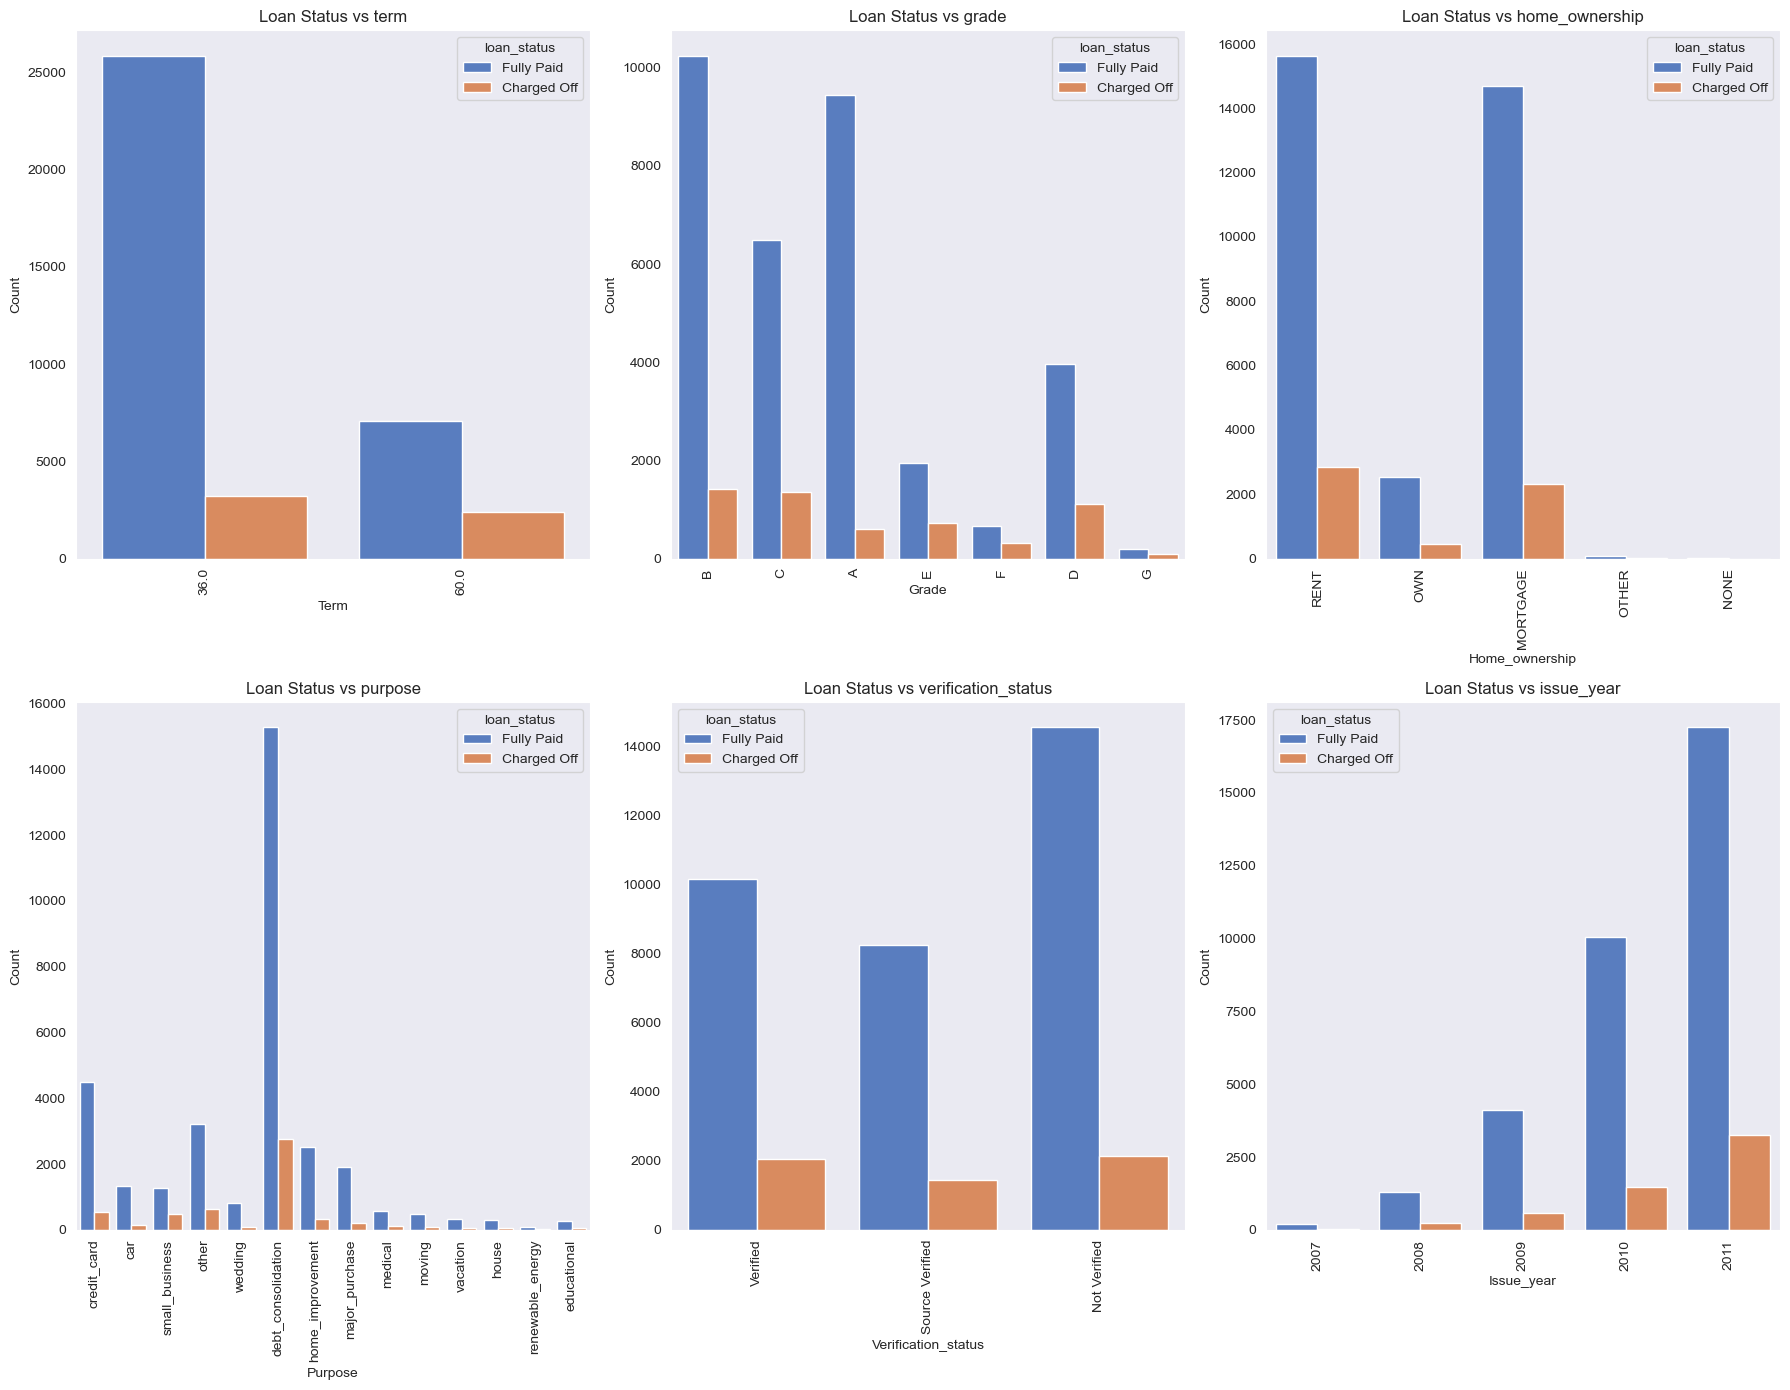

In [68]:
categories = ['term', 'grade', 'home_ownership', 'purpose', 'verification_status', 'issue_year']

# Set up the matplotlib figure with 2 rows and 3 columns (2x3 grid)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 14))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each subplot and create a count plot
for i, col in enumerate(categories):
    sns.countplot(
        data=loan, 
        x=col, 
        hue='loan_status',  # Use loan_status as hue
        ax=axes[i], 
        palette='muted', 
        hue_order=['Fully Paid', 'Charged Off']
    )
    axes[i].set_title(f'Loan Status vs {col}')
    axes[i].set_xlabel(col.capitalize())  # Set x-axis label to category name
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

# Observations:

# Term vs Loan Status: 36-month loans have a lower chance of default compared to 60-month loans.
# Grade vs Loan Status: A-grade loans are the safest, with very low default risks compared to other grades.
# Home Ownership vs Loan Status: Homeowners are more likely to repay their loans fully compared to renters or those with mortgages.
# Purpose vs Loan Status: While debt consolidation loans are most commonly repaid, they also have the highest number of defaulters.
# Verification Status vs Loan Status: Interestingly, loans given without verified income have a lower likelihood of default.
# Issue Year vs Loan Status: Both fully paid loans and defaulters have increased year by year.


### Key Insight: Loans with shorter terms, higher grades, home ownership, unverified income, and a debt consolidation purpose are more likely to be fully paid.